Task-1

Data Preprocessing

In [9]:
#1

import pandas as pd

# Load the red and white wine datasets
red_wine = pd.read_csv("winequality-red.csv", sep=";")
white_wine = pd.read_csv("winequality-white.csv", sep=";")

# Display basic info
print("Red Wine Dataset:")
red_wine.info()
print("\nWhite Wine Dataset:")
white_wine.info()

Red Wine Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB

White Wine Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns 

In [10]:
# Check for missing values
print("\nMissing values in red wine:\n", red_wine.isnull().sum())
print("\nMissing values in white wine:\n", white_wine.isnull().sum())

# If missing values exist, handle them (e.g., drop or impute)
red_wine = red_wine.dropna()
white_wine = white_wine.dropna()


Missing values in red wine:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Missing values in white wine:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [11]:
#2

from sklearn.preprocessing import StandardScaler

# Select only feature columns (excluding 'quality')
features = red_wine.columns[:-1]

# Initialize the scaler
scaler = StandardScaler()

# Normalize the datasets
red_wine[features] = scaler.fit_transform(red_wine[features])
white_wine[features] = scaler.fit_transform(white_wine[features])

# Display the first few rows after normalization
print("\nRed Wine Dataset (Normalized):")
print(red_wine.head())

print("\nWhite Wine Dataset (Normalized):")
print(white_wine.head())


Red Wine Dataset (Normalized):
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
1      -0.298547          1.967442    -1.391472        0.043416   0.223875   
2      -0.298547          1.297065    -1.186070       -0.169427   0.096353   
3       1.654856         -1.384443     1.484154       -0.453218  -0.264960   
4      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.466193             -0.379133  0.558274  1.288643  -0.579207   
1             0.872638              0.624363  0.028261 -0.719933   0.128950   
2            -0.083669              0.229047  0.134264 -0.331177  -0.048089   
3             0.107592              0.411500  0.664277 -0.979104  -0.461180   
4            -0.466193             -0.379133  0.558274  1.288643  -0.579207   

    alcohol  quality  
0

Task 2

Dimensionality Reduction & Visualization

In [12]:
#1

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
red_wine = pd.read_csv("winequality-red.csv", sep=";")
white_wine = pd.read_csv("winequality-white.csv", sep=";")

# Add a column to differentiate wine types
red_wine["wine_type"] = "red"
white_wine["wine_type"] = "white"

# Combine datasets
wine_data = pd.concat([red_wine, white_wine], ignore_index=True)

# Separate features and target
X = wine_data.drop(columns=["quality", "wine_type"])  # Features (excluding quality and wine type)
y = wine_data[["quality"]]  # Target variable (wine quality)

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA with 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Create DataFrame with PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3'])

# Add quality values for visualization
pca_df['Quality'] = y['quality'].values

# Print results
print("Shape of transformed data:", X_pca.shape)
print("\nFirst few rows of PCA transformed data:")
print(pca_df.head())

# Explained variance of each component
print("\nExplained variance ratio:", pca.explained_variance_ratio_)

Shape of transformed data: (6497, 3)

First few rows of PCA transformed data:
        PC1       PC2       PC3  Quality
0 -3.205996  0.416523 -2.722237        5
1 -3.039051  1.107462 -2.046952        5
2 -3.071893  0.878964 -1.742580        5
3 -1.571262  2.112545  2.592917        6
4 -3.205996  0.416523 -2.722237        5

Explained variance ratio: [0.2754426  0.22671146 0.14148609]


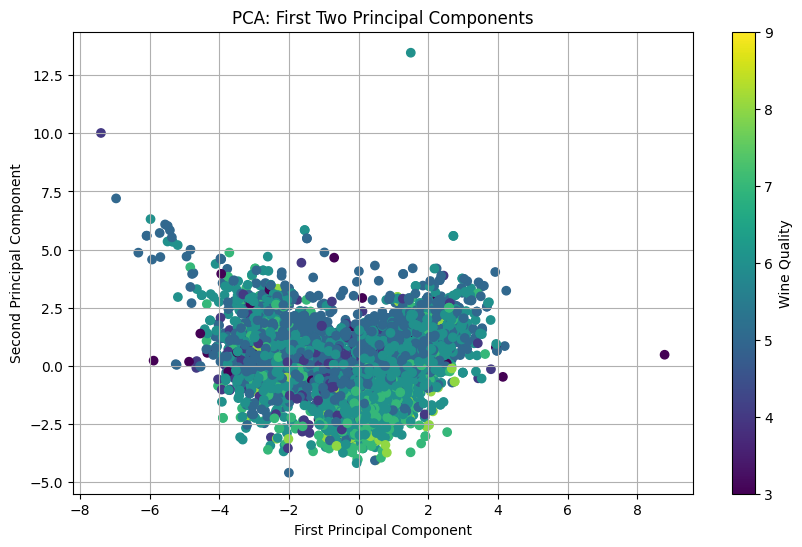

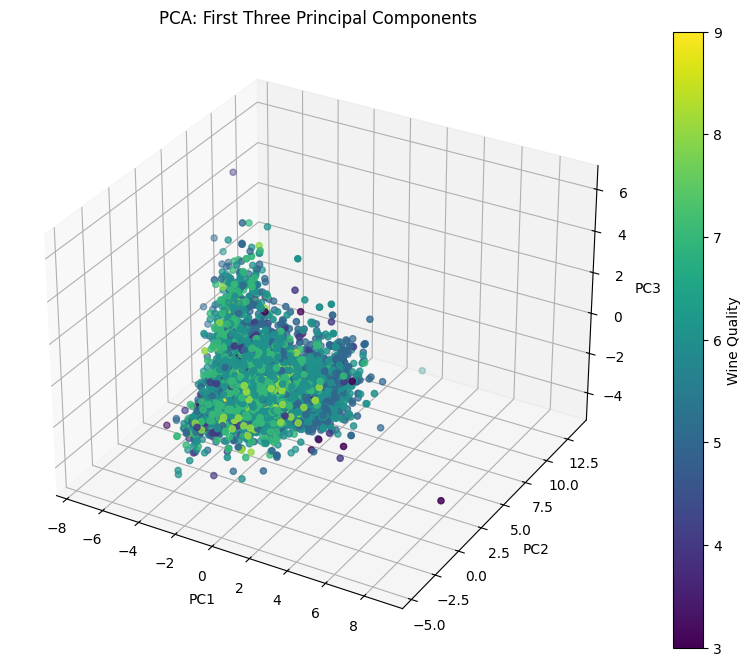

In [13]:
#2

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 2D Scatter Plot (PC1 vs PC2)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'],c=pca_df['Quality'], cmap='viridis')
plt.colorbar(scatter, label='Wine Quality')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA: First Two Principal Components')
plt.grid(True)
plt.show()

# 3D Scatter Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'],c=pca_df['Quality'], cmap='viridis')
plt.colorbar(scatter, label='Wine Quality')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('PCA: First Three Principal Components')
plt.show()

Variance Explained by Each Principal Component:
PC1: 0.2754 (27.54%)
PC2: 0.2267 (22.67%)
PC3: 0.1415 (14.15%)

Total Variance Explained by First 3 Components: 64.36%


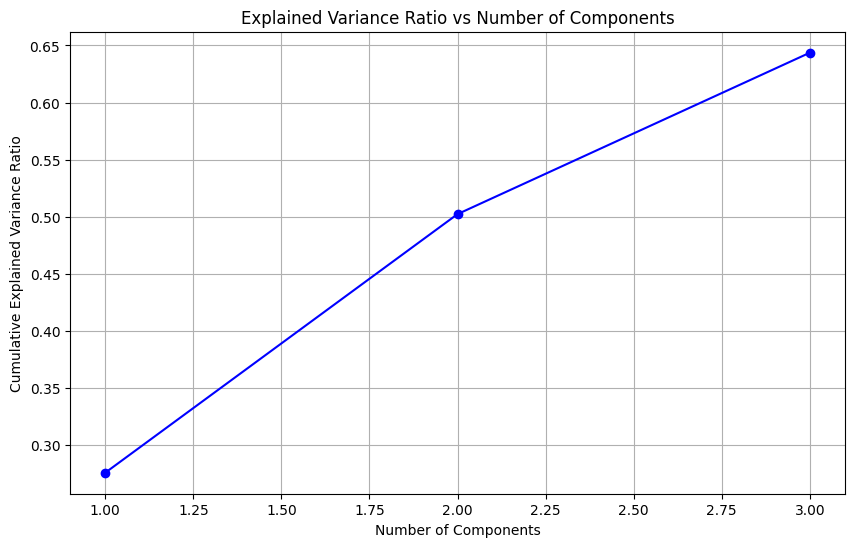

In [14]:
#3
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Print variance explained by each component
print("Variance Explained by Each Principal Component:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio:.4f} ({ratio*100:.2f}%)")
print(f"\nTotal Variance Explained by First 3 Components: {sum(explained_variance_ratio)*100:.2f}%")

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, 4), cumulative_variance, 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs Number of Components')
plt.grid(True)
plt.show()

Task-3

Comparison with t-SNE

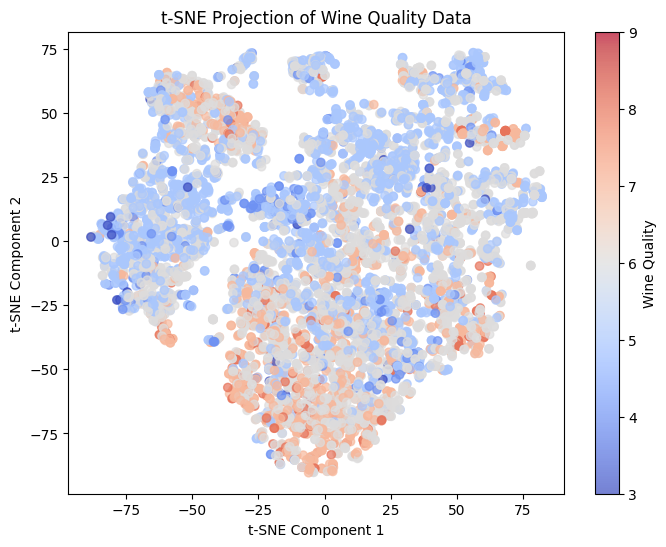

In [17]:
#1

# Import required libraries
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Create t-SNE plot
plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y['quality'], cmap='coolwarm', alpha=0.7)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.colorbar(label="Wine Quality")
plt.title("t-SNE Projection of Wine Quality Data")
plt.show()

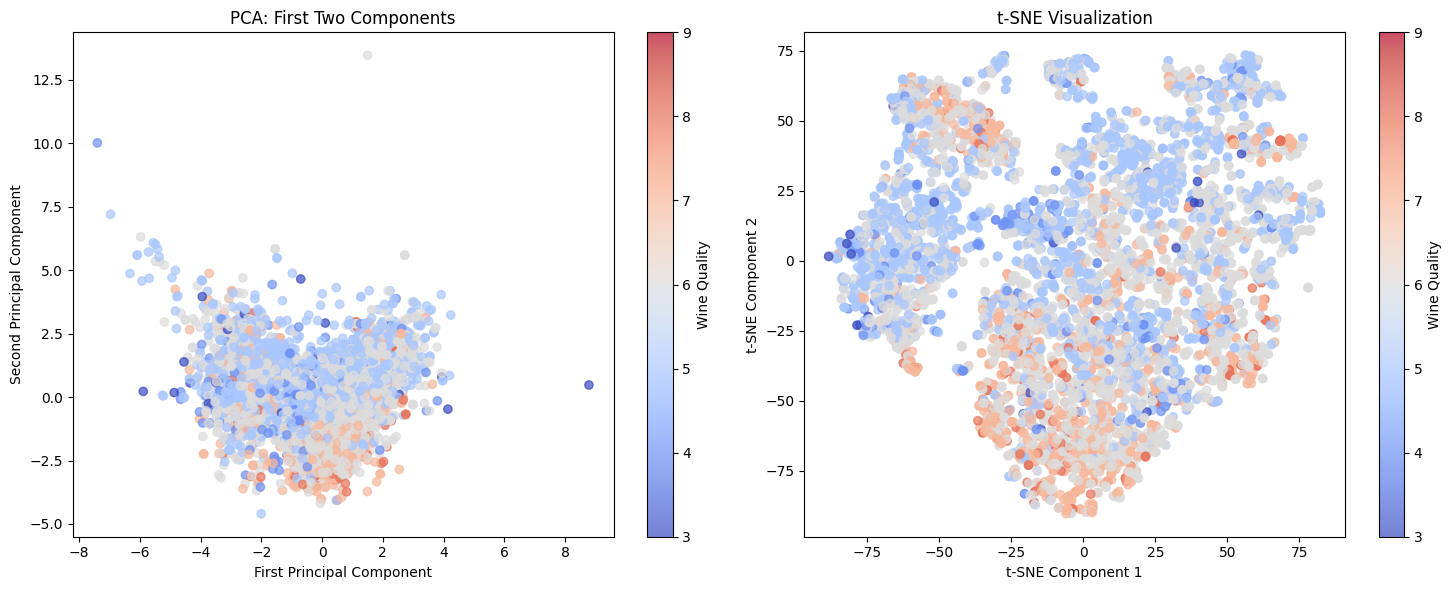

In [18]:
#2

# Create side-by-side plots for comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# PCA Plot
ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=y['quality'], cmap='coolwarm', alpha=0.7)
ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
ax1.set_title('PCA: First Two Components')
fig.colorbar(ax1.collections[0], ax=ax1, label='Wine Quality')

# t-SNE Plot
ax2.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y['quality'], cmap='coolwarm', alpha=0.7)
ax2.set_xlabel('t-SNE Component 1')
ax2.set_ylabel('t-SNE Component 2')
ax2.set_title('t-SNE Visualization')
fig.colorbar(ax2.collections[0], ax=ax2, label='Wine Quality')

plt.tight_layout()
plt.show()

PCA reduces dimensionality through a linear transformation, maintaining the global structure of the data. It allows easy interpretation by analyzing variance distribution across principal components. However, PCA does not always create clear clusters, as seen in the wine quality scatter plot.

t-SNE is a nonlinear method that prioritizes local structure, making it better at clustering similar points together. The t-SNE scatter plot revealed more distinct clusters, effectively grouping similar wines. However, t-SNE is computationally expensive and harder to interpret, as its transformed features lack a direct connection to the original dataset.

In [20]:
#3

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Apply KMeans to both PCA and t-SNE results
kmeans_pca = KMeans(n_clusters=len(set(y['quality'])), random_state=42)
kmeans_tsne = KMeans(n_clusters=len(set(y['quality'])), random_state=42)

# Fit and get silhouette scores
pca_clusters = kmeans_pca.fit_predict(X_pca[:, :2])
tsne_clusters = kmeans_tsne.fit_predict(X_tsne)

pca_silhouette = silhouette_score(X_pca[:, :2], pca_clusters)
tsne_silhouette = silhouette_score(X_tsne, tsne_clusters)

# Print comparison metrics
print("Clustering Quality Comparison:")
print(f"PCA Silhouette Score: {pca_silhouette:.3f}")
print(f"t-SNE Silhouette Score: {tsne_silhouette:.3f}")

Clustering Quality Comparison:
PCA Silhouette Score: 0.344
t-SNE Silhouette Score: 0.403


PCA identifies directions of maximum variance and uses a linear transformation to project data onto these principal components. This helps in dimensionality reduction and feature selection while maintaining global structure. However, PCA struggles to capture nonlinear patterns in high-dimensional data.

t-SNE focuses on local similarities, grouping similar data points together in lower dimensions. This makes it highly effective for clustering and discovering hidden structures, but it is computationally expensive and does not preserve global distances, making numerical interpretations difficult.

PCA is ideal for structured dimensionality reduction and interpretability, while t-SNE excels in clustering and visualizing complex relationships.